Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to
see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each
passenger is distributed by plotting a histogram.

djrp
displot
jointplot
rugplot
pairplot

In [32]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [34]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [35]:
df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
# Filling Null values
df['age'] = df['age'].fillna(df['age'].mean())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embarked'] = df['embarked'].fillna('X')
df = df.dropna()
df = df.reset_index()
df = df.drop('index',axis =1)


In [37]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
885,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
887,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [39]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [40]:
#checking numerical values
numericals = [col for col in df if(str(df[col].dtype)=='float64' or str(df[col].dtype)=='int64') and col not in ['parch','pclass','survived','sibsp']]
numericals
df_num = df[numericals]
df_num

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
884,27.000000,13.0000
885,19.000000,30.0000
886,29.699118,23.4500
887,26.000000,30.0000


In [41]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR


age     13.0000
fare    23.1042
dtype: float64

In [42]:
((df_num <= Q1 - (1.5 *IQR)) | (df_num >= Q3 + (1.5 *IQR))).sum()

age      65
fare    114
dtype: int64

In [43]:
outlier_indices = []
for i in range(len(df)):
    if(df['age'].iloc[i] <= (Q1['age'] - 1.5 * IQR['age']) or (df['age'].iloc[i] >= (Q3['age'] + 1.5 * IQR['age']))):
        outlier_indices.append(i)
    else:
        if(df['fare'].iloc[i] <= (Q1['fare'] - 1.5 * IQR['fare']) or (df['fare'].iloc[i] >= (Q3['fare'] + 1.5 * IQR['fare']))):
            outlier_indices.append(i)
# outlier_indices

In [44]:
df = df.drop(list(set(outlier_indices)),axis=0)
df = df.reset_index()
df = df.drop(['index'],axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
2,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
4,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
717,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
718,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
719,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
# sns.histplot(data = df,x = 'fare')

<Figure size 1000x1000 with 0 Axes>

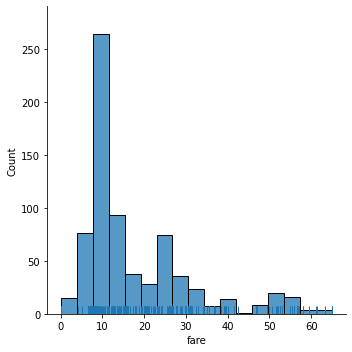

In [49]:
plt.figure(figsize=(10,10),dpi = 100)
sns.displot(data = df,x = 'fare',rug = True)
plt.show()

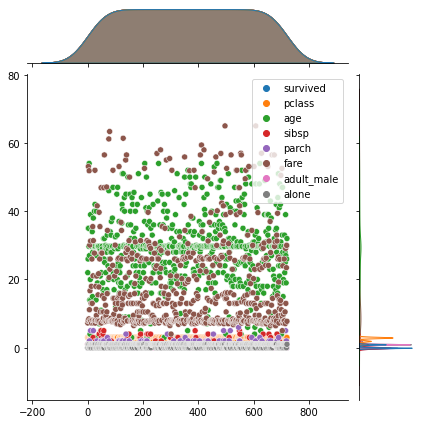

In [80]:
sns.jointplot(data = df)

<AxesSubplot:xlabel='fare', ylabel='age'>

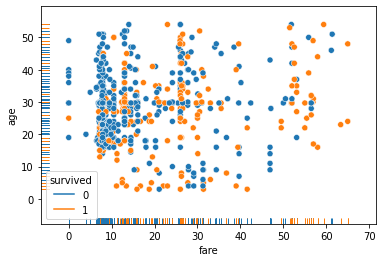

In [51]:
sns.scatterplot(data = df,x = 'fare',y = 'age',hue = 'survived')
sns.rugplot(data = df,x = 'fare',y = 'age',hue = 'survived')

<AxesSubplot:xlabel='fare', ylabel='Count'>

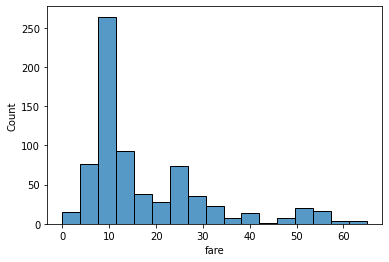

In [55]:
sns.histplot(data = df,x = 'fare')

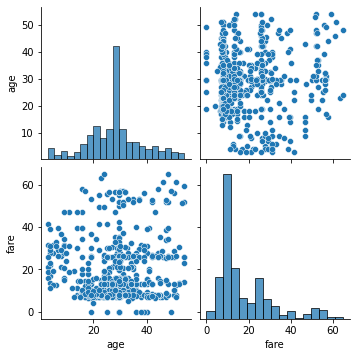

In [60]:
sns.pairplot(data = df[['age','fare']])

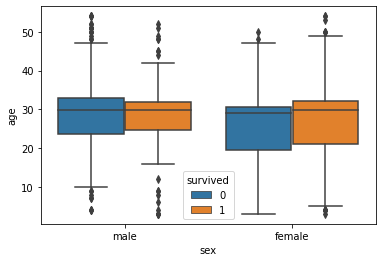

In [69]:

sns.boxplot(data = df,x = 'sex',y = 'age',hue = 'survived')
plt.show()

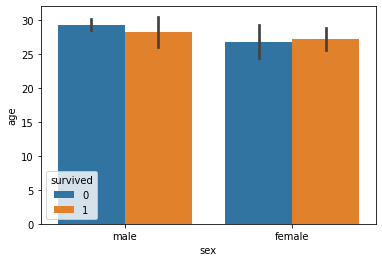

In [72]:
sns.barplot(data = df,x = 'sex',y = 'age',hue = 'survived')
plt.show()

c:\Users\Abhishek Dhanraj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Abhishek Dhanraj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

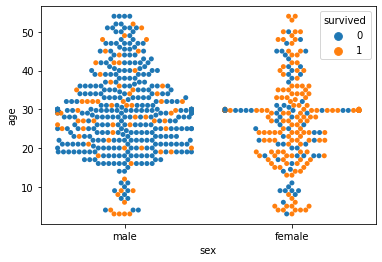

In [73]:
sns.swarmplot(data = df,x = 'sex',y = 'age',hue = 'survived')

<AxesSubplot:xlabel='sex', ylabel='age'>

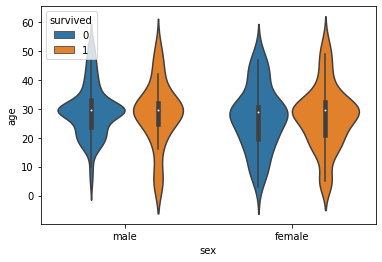

In [74]:
sns.violinplot(data = df,x = 'sex',y = 'age',hue = 'survived')

<AxesSubplot:xlabel='sex', ylabel='age'>

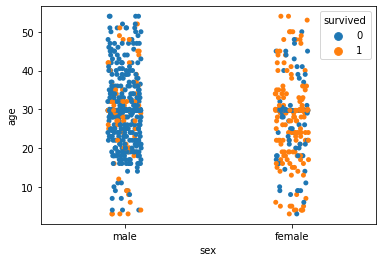

In [75]:
sns.stripplot(data = df,x = 'sex',y = 'age',hue = 'survived')

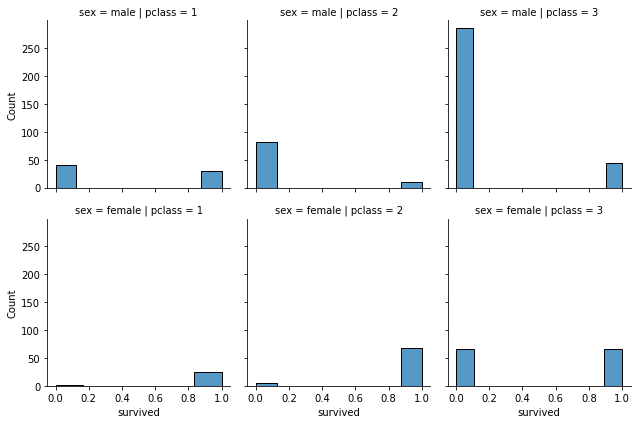

In [79]:
ax = sns.FacetGrid(data = df,row = 'sex',col = 'pclass')
ax.map(sns.histplot,'survived')
plt.show()